In [42]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier

In [2]:
data = pd.read_csv('fake-news/train.csv')

In [3]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
#dropping the dependent features 

X = data.drop('label', axis=1)

In [5]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
y = data['label']

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [9]:
data.shape

(20800, 5)

In [11]:
#dropping NaN values 
data = data.dropna()

In [13]:
data.shape

(18285, 5)

In [14]:
msg = data.copy()

In [16]:
msg.reset_index(inplace=True)

In [17]:
msg.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [20]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(msg)):
    review = re.sub('[^a-zA-Z]', ' ', msg['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [21]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

In [22]:
#TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [23]:
X.shape

(18285, 5000)

In [25]:
y=msg['label']

In [26]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [27]:
tfidf_v.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [28]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [30]:
count_data = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [31]:
count_data.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.018021,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.055632,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.334213,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
classifier=MultinomialNB()

accuracy:   0.905
Confusion matrix, without normalization


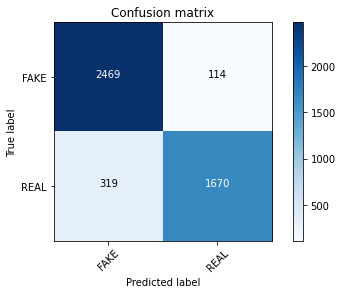

In [37]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [38]:
score

0.9052930883639545

In [39]:
y_train.shape

(13713,)

In [44]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.949
Confusion matrix, without normalization


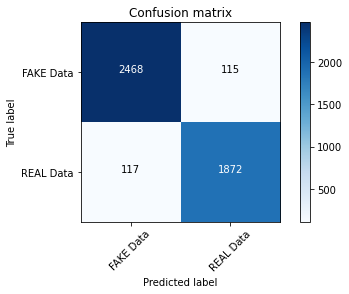

In [45]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [47]:
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.9068241469816273
Alpha: 0.1, Score : 0.9061679790026247
Alpha: 0.2, Score : 0.9066054243219598
Alpha: 0.30000000000000004, Score : 0.9061679790026247
Alpha: 0.4, Score : 0.9063867016622922
Alpha: 0.5, Score : 0.9052930883639545
Alpha: 0.6000000000000001, Score : 0.905074365704287
Alpha: 0.7000000000000001, Score : 0.905511811023622
Alpha: 0.8, Score : 0.9057305336832896
Alpha: 0.9, Score : 0.9059492563429571


In [49]:
## Get Features names
feature_names = tfidf_v.get_feature_names()

In [50]:
classifier.coef_[0]

/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-9.55272601, -8.96546305, -8.69909129, ..., -9.06404927,
       -8.24602816, -8.50048987])

In [51]:
#Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.382917990850731, 'clinton'),
 (-5.496716004097591, 'trump'),
 (-5.681241581404793, 'hillari'),
 (-5.914607539960018, 'us'),
 (-5.93450253862279, 'elect'),
 (-6.139289085369481, 'peopl'),
 (-6.14933157476194, 'vote'),
 (-6.183055030707973, 'state'),
 (-6.206534769933965, 'email'),
 (-6.220676032774445, 'one'),
 (-6.299830339164105, 'hillari clinton'),
 (-6.302098527895232, 'fbi'),
 (-6.307417641199448, 'would'),
 (-6.321530493755049, 'like'),
 (-6.379447292939952, 'time'),
 (-6.379636720931736, 'american'),
 (-6.404982641868616, 'world'),
 (-6.413167966131299, 'war'),
 (-6.448128973145213, 'year'),
 (-6.44876762068066, 'use')]

In [52]:
#Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-11.09806875722921, 'brief post'),
 (-11.09806875722921, 'follow pam'),
 (-11.09806875722921, 'follow pam key'),
 (-11.09806875722921, 'gorsuch'),
 (-11.09806875722921, 'judg gorsuch'),
 (-11.09806875722921, 'key twitter'),
 (-11.09806875722921, 'key twitter pamkeynen'),
 (-11.09806875722921, 'morn brief'),
 (-11.09806875722921, 'mr bannon'),
 (-11.09806875722921, 'mr castro'),
 (-11.09806875722921, 'mr christi'),
 (-11.09806875722921, 'mr cruz'),
 (-11.09806875722921, 'mr de'),
 (-11.09806875722921, 'mr flynn'),
 (-11.09806875722921, 'mr kushner'),
 (-11.09806875722921, 'mr roof'),
 (-11.09806875722921, 'mr sander'),
 (-11.09806875722921, 'mr scott'),
 (-11.09806875722921, 'mr session'),
 (-11.09806875722921, 'mr spicer'),
 (-11.09806875722921, 'mr xi'),
 (-11.09806875722921, 'ms trump'),
 (-11.09806875722921, 'pam key'),
 (-11.09806875722921, 'pam key twitter'),
 (-11.09806875722921, 'pamkeynen'),
 (-11.09806875722921, 'pruitt'),
 (-11.09806875722921, 'tillerson'),
 (-11.0980687572

In [59]:
hs_vectorizer=HashingVectorizer(n_features=5000,alternate_sign=False)
X=hs_vectorizer.fit_transform(corpus).toarray()

In [60]:
X.shape

(18285, 5000)

In [61]:
X

array([[0.        , 0.15922347, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03785056, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02285155, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06880662, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [62]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

accuracy:   0.882
Confusion matrix, without normalization


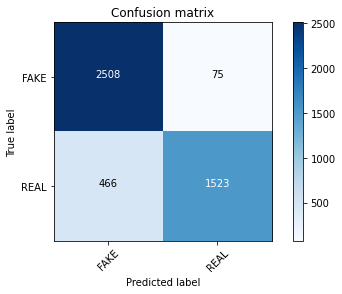

In [63]:
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])